In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# filter

In [2]:
deseq_result = pd.read_csv('/data1/DYY/bambu/count_matrix_deseq2/all_result.csv',sep='\t',index_col=0)
deseq_result = deseq_result.loc[(deseq_result.padj<0.05)]

data = pd.read_csv('/data1/DYY/bambu/count_matrix_deseq2/all_norm.counts.fn',sep='\t')
data = data.loc[deseq_result.index,:]

In [5]:
data = data.T

In [23]:
group = pd.read_csv('/data1/DYY/data/group.csv', sep='\t')
pal = sns.color_palette(palette='tab20')
lut = dict(zip(list(group.Group.unique()), pal))
networks = group.Group.unique()
colors = pd.Series(networks, index=group.Group.unique()).map(lut)
del group

In [25]:
group = pd.read_csv('/data1/DYY/data/group.csv', sep='\t')
pal = sns.color_palette(palette='tab10')
lut = dict(zip(list(group.Sample.unique()), pal))
networks = group.Sample.unique()
ten_colors = pd.Series(networks, index=group.Sample.unique()).map(lut)
del group

In [34]:
# data.drop(['Sample ID', 'Type'], axis=1).to_csv('/data1/DYY/data/332samples_fdr<0.05_gene.csv', sep='\t')
# data = data.set_index('Sample')

In [1208]:
# unfilter = pd.read_csv('/data1/DYY/bambu/count_matrix_deseq2/all_norm.counts.fn', sep='\t').T
group = pd.read_csv('/data1/DYY/bambu/350_samples_group.csv', sep='\t').rename(columns={'Sample':'name'})
group.loc[:,'tissue'] = group_['Sample ID'].apply(lambda x:x[:3])
group["Group"] =group_["Type"].map(str) +"-"+ group_["tissue"].map(str)

In [26]:
plot_data = data.reset_index().rename(columns={'index':'name'}).merge(group[['name','Group']]).set_index(['name','Group']).T#.drop('Cluster')

In [28]:
plot_data = plot_data.astype(float)

In [30]:
plot_data = plot_data.T.reset_index().sort_values('Group').set_index(['name','Group']).T

In [34]:
convert_dict=group.set_index('name')[['Sample ID']].to_dict()

In [180]:
filter_data = plot_data.T.reset_index()
filter_data.name = filter_data.name.map(convert_dict['Sample ID'])

In [366]:
drop_list=['BLA6','BLA13','BLA9','BLA3','BLA19','BRE12','BRE6','BRE19','BRE20','CER7','CER3','CER20'#,'CER4']#,'CER10',
           ,'COL13','COL5','COL6','COL4','END9','END3','END2','LIV4','LIV5','LIV20','REC4','REC7','LUN16','STO7','STO13','STO4','STO3','STO5','STO9']#,'COL1','COL6','KID3'
          # ,'STO15','STO17','STO8']

In [82]:
len(drop_list)

31

In [368]:
filter_data = filter_data.drop(filter_data.loc[filter_data.name.isin(drop_list)].index)

In [370]:
len(filter_data)

288

In [1210]:
group = group.loc[~group['Sample ID'].isin(drop_list)].reset_index(drop=True)

In [484]:
group[['name','Type','Sample ID']].to_csv('/data1/DYY/bambu/288_group.csv',sep='\t',index=False)

<Figure size 500x400 with 0 Axes>

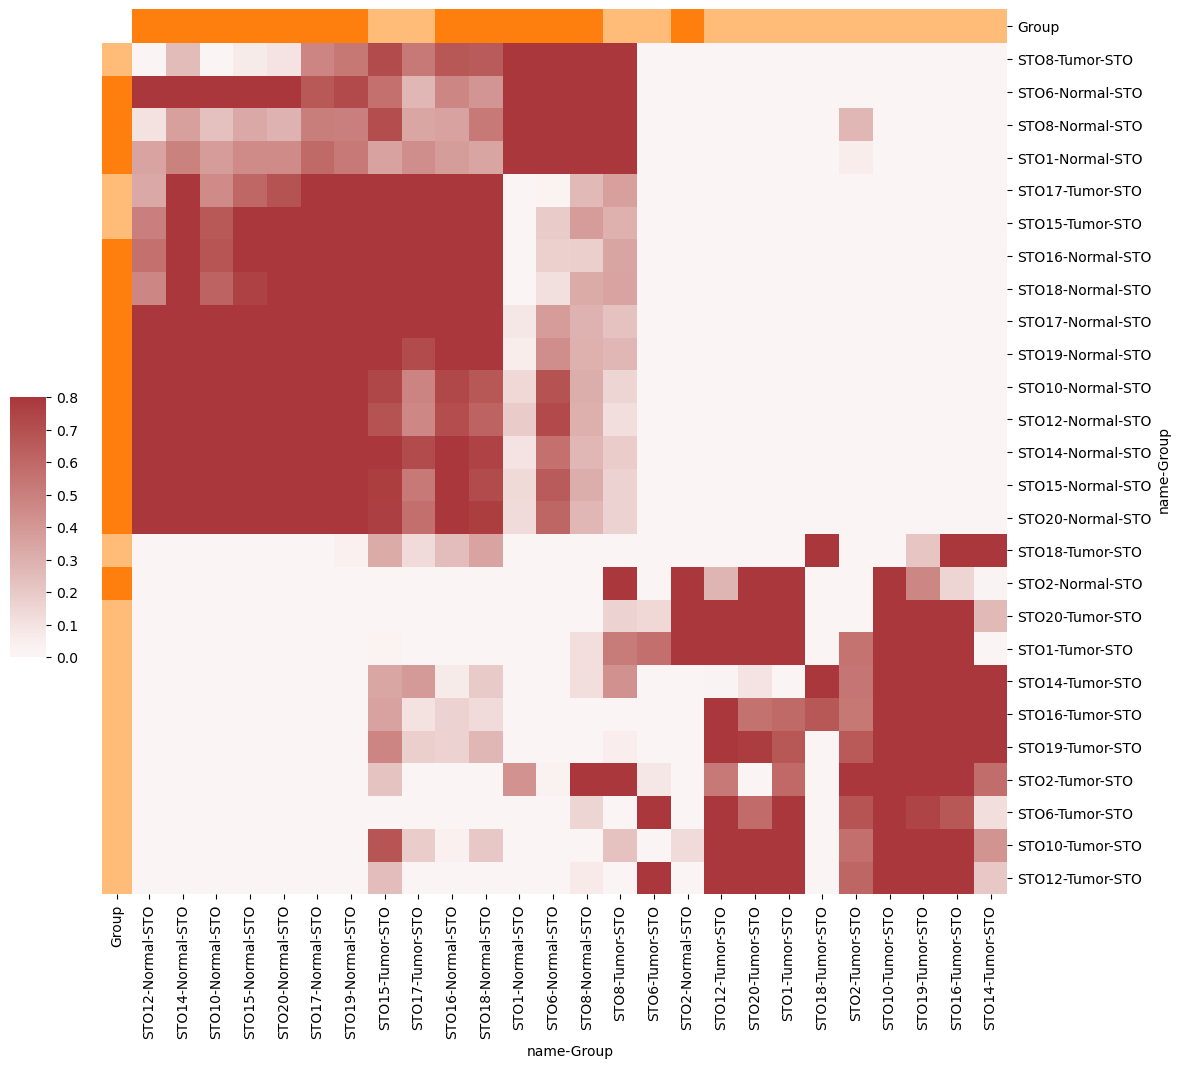

In [374]:
sorted_clustermap(filter_data.loc[(filter_data['Group']=='Normal-STO') | (filter_data['Group']=='Tumor-STO')].set_index(['name','Group']).T,rc=True,cc=True,met='ward')
plt.savefig('/data1/DYY/bambu/plot/cluster_for_filter/STO.pdf',bbox_inches='tight')

# normalized filtered

In [27]:
deseq_result = pd.read_csv('/data1/DYY/bambu/288_count_matrix_deseq2/all_result.csv',sep='\t',index_col=0)
deseq_result = deseq_result.loc[(deseq_result.padj<0.05)]

data = pd.read_csv('/data1/DYY/bambu/count_matrix_deseq2/all_norm.counts.fn',sep='\t')
data = data.loc[deseq_result.index,:]
data = data.T
group = pd.read_csv('/data1/DYY/bambu/288_group.csv', sep='\t')
group.loc[:,'tissue'] = group['Sample ID'].apply(lambda x:x[:3])
group["Group"] =group["Type"].map(str) +"-"+ group["tissue"].map(str)
plot_data = data.reset_index().rename(columns={'index':'name'}).merge(group[['name','Group']]).set_index(['name','Group']).T#.drop('Cluster')
plot_data = plot_data.astype(float)
plot_data = plot_data.T.reset_index().sort_values('Group').set_index(['name','Group']).T
convert_dict=group.set_index('name')[['Sample ID']].to_dict()

In [28]:
# unfilter = pd.read_csv('/data1/DYY/bambu/count_matrix_deseq2/all_norm.counts.fn', sep='\t').T
# group = pd.read_csv('/data1/DYY/data/288_group.csv', sep='\t')
# group = group.drop('Sample', axis=1).rename(columns={'name':'Sample'})
merge_df = data.reset_index().rename(columns={'index':'name'}).merge(group).drop(['tissue','Group'],axis=1)
normal_df = merge_df[merge_df.Type=='Normal']
# normal_df = normal_df.loc[normal_df.Sample.isin(group.name)]
normal_group = normal_df[['Sample ID']].reset_index(drop=True)
normal_df = normal_df.drop(['Type','Sample ID'],axis=1).set_index('name')
all_group = merge_df[['Sample ID']].reset_index(drop=True)
merge_df = merge_df.drop(['Type','Sample ID'],axis=1).set_index('name')

In [561]:
final_dict={}
for k,v in finalDf.groupby('Tissue'):
    final_dict[k]=v

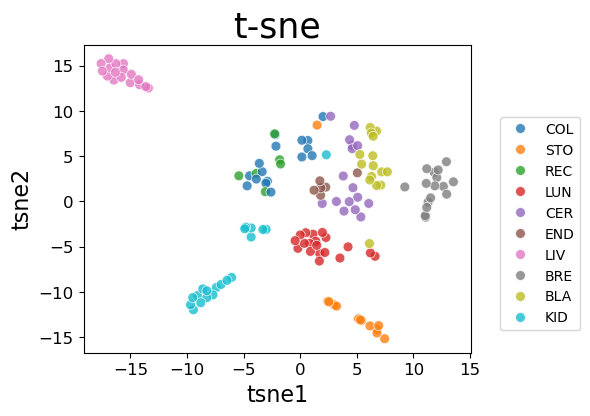

In [569]:
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=20, n_jobs=10, random_state=47).fit_transform(normal_df)
principalDf = pd.DataFrame(X_embedded, columns=['tsne1','tsne2'])
finalDf = pd.concat([principalDf,normal_group], axis=1)
finalDf['Tissue'] = [x[:3] for x in finalDf['Sample ID']]
plt.figure(figsize=(5,4))
# markers = {"Normal": "X", "Tumor": "o"}
fig = sns.scatterplot(data=finalDf, x="tsne1", y="tsne2", hue=finalDf['Tissue'], s=50, alpha  = 0.8)
fig.set_xlabel('tsne1',fontsize=16)
fig.set_ylabel('tsne2',fontsize=16)
fig.set_title("t-sne",fontsize=25)
fig.tick_params(labelsize=12) #刻度大小
# plt.show()
plt.legend(loc='lower right',bbox_to_anchor=(1.3,0.05))
scatter_fig = fig.get_figure()
fig_path = "/data1/DYY/bambu/plot/figure1/288_sample_t-sne_sactterplot.pdf"
scatter_fig.savefig(fig_path, dpi = 400)

In [61]:
merge_df = merge_df.loc[:,merge_df.columns.str.startswith('ENSG')]

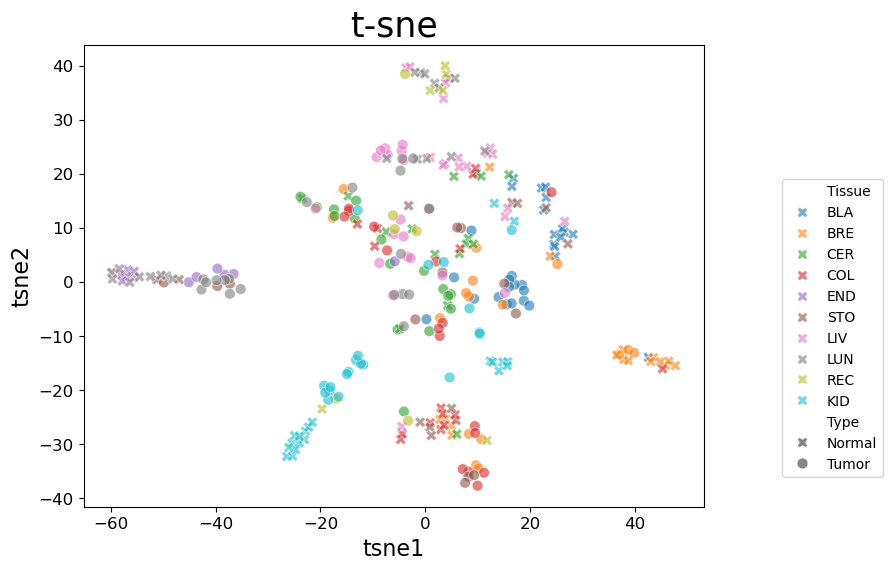

In [89]:
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=10, n_jobs=100, random_state=47).fit_transform(merge_df)
principalDf = pd.DataFrame(X_embedded, columns=['tsne1','tsne2'])
finalDf = pd.concat([principalDf,group], axis=1)
finalDf['Tissue'] = [x[:3] for x in finalDf['Sample ID']]
plt.figure(figsize=(8,6))
markers = {"Normal": "X", "Tumor": "o"}
fig = sns.scatterplot(data=finalDf, x="tsne1", y="tsne2", hue=finalDf['Tissue'], s=60, alpha  = 0.6, markers=markers,style="Type")
fig.set_xlabel('tsne1',fontsize=16)
fig.set_ylabel('tsne2',fontsize=16)
fig.set_title("t-sne",fontsize=25)
fig.tick_params(labelsize=12) #刻度大小
# plt.show()
plt.legend(loc='lower right',bbox_to_anchor=(1.3,0.05))
scatter_fig = fig.get_figure()
fig_path = "/data1/DYY/bambu/plot/figure1/1121_288_samples_t-sne_tumor_sactterplot.pdf"
scatter_fig.savefig(fig_path, dpi = 400)


In [581]:
def sorted_clustermap(data,met="single",zsc=0,metr="euclidean",rc=False,cc=False):
    #输入data要以样本名为列名，列的title为#
    # pal = sns.color_palette(palette='tab20')
    # lut = dict(zip(list(group['Group'].unique()), pal))
    # # Convert the palette to vectors that will be drawn on the side of the matrix
    networks = data.columns.get_level_values("Group")
    colors = pd.Series(networks, index=data.columns).map(lut)
    # # Draw the full plot
    plt.figure(figsize=(5,4))
    g = sns.clustermap(data.corr(), center=0, cmap="vlag",
                       row_colors=colors,
                       col_colors=colors,
                       row_cluster=rc, 
                       col_cluster=cc,
                       metric=metr, 
                       vmin=0,
                       vmax=0.8,
                       z_score=zsc,
                       method=met,#更改cluster方式
                       dendrogram_ratio=(.1, .2),
                       cbar_pos=(.02, .32, .03, .2),#mask=True,
                       figsize=(12, 13)#, cbar_kws=group['Sample']
                      )
    # plt.legend()
    g.ax_row_dendrogram.remove()
    g.ax_col_dendrogram.remove()
    return g

In [583]:
plot_data = plot_data.T.reset_index().loc[plot_data.T.reset_index().name.isin(group.name)].set_index(['name','Group']).T

In [1981]:
plot_data.corr()

,name,A1901740PD1TN3,A1801005J07TN3,A1801664J07TN3,A1901742PD1TN3,A1901741PD1TN3,A1802225J07TN3,A1802228J07TN3,A1803488J07TN2,A1803953PD1TN1,A1804216PD1TN1,...,A1902411D19TT1,A1902418D19TT1,A1902423D19TT1,A1700648E05TT1,A1700649E05TT1,A1700650E05TT1,A1702369E05TT1,A1702367E05TT1,A1901952D19TT1,A1700656E05TT1
,Group,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,Normal-BLA,...,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO,Tumor-STO
name,Group,,,,,,,,,,,,,,,,,,,,,
A1901740PD1TN3,Normal-BLA,1.000000,0.536415,0.535616,0.764051,0.834867,0.653865,0.417982,0.631998,0.558043,0.851936,...,0.165983,0.182136,0.157392,0.530777,0.412800,0.316018,0.543101,0.395118,0.098692,0.443647
A1801005J07TN3,Normal-BLA,0.536415,1.000000,0.511223,0.399099,0.431822,0.917427,0.373745,0.607947,0.577141,0.613311,...,0.123246,0.112005,0.109289,0.324445,0.215185,0.170783,0.293065,0.240423,0.066326,0.210042
A1801664J07TN3,Normal-BLA,0.535616,0.511223,1.000000,0.365780,0.435522,0.650986,0.592468,0.618437,0.446145,0.589485,...,0.104281,0.119157,0.132579,0.328001,0.269840,0.208787,0.365879,0.266862,0.084855,0.363190
A1901742PD1TN3,Normal-BLA,0.764051,0.399099,0.365780,1.000000,0.893366,0.482685,0.274446,0.446382,0.559596,0.742076,...,0.136681,0.153994,0.149817,0.439756,0.337614,0.247977,0.445832,0.298225,0.090370,0.322275
A1901741PD1TN3,Normal-BLA,0.834867,0.431822,0.435522,0.893366,1.000000,0.515558,0.392640,0.461392,0.666372,0.796797,...,0.140785,0.166811,0.136934,0.438457,0.328712,0.235903,0.430825,0.275256,0.092192,0.340825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1700650E05TT1,Tumor-STO,0.316018,0.170783,0.208787,0.247977,0.235903,0.202257,0.157123,0.169693,0.242605,0.328229,...,0.066097,0.069873,0.067461,0.800503,0.691538,1.000000,0.567077,0.701843,0.051892,0.666825
A1702369E05TT1,Tumor-STO,0.543101,0.293065,0.365879,0.445832,0.430825,0.370905,0.237035,0.409802,0.348232,0.524353,...,0.126747,0.133441,0.143800,0.765498,0.737695,0.567077,1.000000,0.760740,0.092642,0.732789


<Figure size 500x400 with 0 Axes>

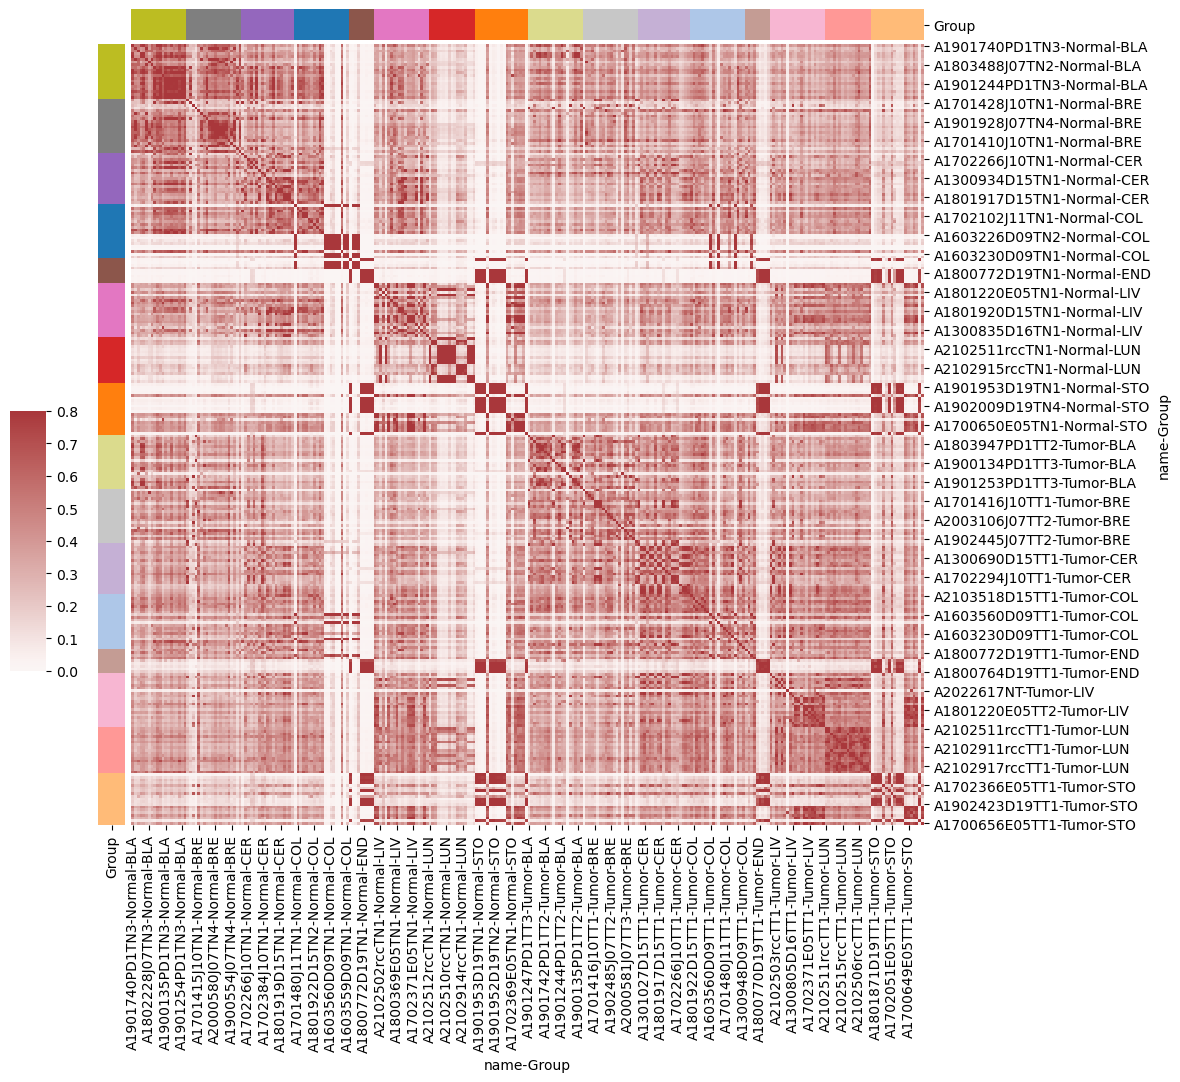

In [585]:
sorted_clustermap(plot_data,met='ward',metr='euclidean',zsc=None)
plt.savefig('/data1/DYY/bambu/plot/figure2/288samples_cluster_by_sample_expression.pdf',bbox_inches='tight')

## 2c

In [589]:
conv = pd.read_csv('/data1/DYY/bambu/288_conver_scatt_gene_all_tis/all_con.txt',header=None)

In [591]:
conv_df = unfilter.loc[:,unfilter.columns.isin(conv[0])]

In [593]:
div = pd.read_csv('/data1/DYY/bambu/288_conver_scatt_gene_all_tis/all_sca.txt',header=None)
scat_df = unfilter.loc[:,unfilter.columns.isin(div[0])]

In [595]:
len(scat_df)

350

In [597]:
len(div)

681

In [599]:
len(conv)

1227

In [601]:
def sort_by_cluster(data,method="centroid"):
    #data行为样本，列为基因，没有index
    data = data.set_index(['name','Group'])
    Z = linkage(data, method)
    f = fcluster(Z,4,'distance')
    #按照cluster值排序
    data['cluster'] = f
    df = data.sort_values('cluster').drop('cluster', axis=1)
    #返回df，需要=
    return df

In [603]:
plot_data2

name,A1300690D15TN1,A1300690D15TT1,A1300741D09TN1,A1300741D09TT1,A1300745D15TN1,A1300745D15TT1,A1300750D15TN1,A1300750D15TT1,A1300805D16TN1,A1300805D16TT1,...,A2102915rccTN1,A2102915rccTT1,A2102917rccTN1,A2102917rccTT1,A2102918rccTN1,A2102918rccTT1,A2102919rccTN1,A2102919rccTT1,A2103518D15TN1,A2103518D15TT1
Group,Normal-COL,Tumor-COL,Normal-STO,Tumor-STO,Normal-COL,Tumor-COL,Normal-COL,Tumor-COL,Normal-REC,Tumor-REC,...,Normal-KID,Tumor-KID,Normal-KID,Tumor-KID,Normal-KID,Tumor-KID,Normal-KID,Tumor-KID,Normal-COL,Tumor-COL
BambuGene100404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BambuGene100600,0.886179,0.698026,0.000000,0.000000,2.948273,0.576206,0.000000,0.000000,0.896974,0.000000,...,0.000000,1.101956,0.000000,0.000000,0.537140,0.000000,1.529787,0.000000,0.901401,0.000000
BambuGene100942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.448487,0.000000,...,58.344523,0.550978,89.764416,0.000000,35.451269,0.000000,46.403552,0.462310,0.000000,0.000000
BambuGene101461,3.544714,0.000000,0.000000,3.121660,7.370684,1.152413,2.712844,0.000000,0.448487,0.000000,...,0.000000,0.000000,2.426065,0.427318,3.222843,1.352607,3.569504,1.386929,0.901401,0.000000
BambuGene101650,25.699178,1.396052,2.799839,9.364981,19.163777,0.576206,1.627706,0.000000,5.830334,1.063643,...,0.000000,11.019563,1.819549,0.427318,4.297124,0.901738,1.529787,28.663194,9.014013,0.881194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000290075.1,0.000000,0.698026,0.000000,0.000000,0.000000,0.576206,0.000000,0.000000,0.000000,0.000000,...,0.000000,9.366628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000290783.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881194
ENSG00000290792.1,0.000000,0.000000,0.000000,3.121660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.101956,0.000000,0.000000,0.000000,1.803476,0.000000,0.000000,3.605605,2.643582


In [605]:
plot_data2 = pd.concat([conv_df,scat_df],axis=1).reset_index().rename(columns={'index':'name'}).merge(group[['name','Group']]).set_index(['name','Group']).T

In [607]:
sorted_data = sort_by_cluster(plot_data2.T.reset_index())

In [609]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique

In [611]:
test2 = sorted_data.reset_index()
mean_330_data = pd.DataFrame()
for i in get_unique_numbers(list(test2.Group)):
    df = test2.loc[test2.Group == i].mean()
    df.name = i
    mean_330_data = mean_330_data.append(df)
    # print(df)
mean_330_data = mean_330_data.reset_index().rename(columns={'index':'group'})
mean_330_data.loc[:,'group'] = mean_330_data.group.str[-3:]+'-'+mean_330_data.group.str[:-4]
mean_330_data = mean_330_data.set_index('group').sort_index()
mean_330_data = mean_330_data.reset_index()
mean_330_data.loc[:,'group'] = mean_330_data.group.str[4:]+'-'+mean_330_data.group.str[:3]
mean_330_data = mean_330_data.set_index('group')

/tmp/ipykernel_745546/1265119497.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = test2.loc[test2.Group == i].mean()
/tmp/ipykernel_745546/1265119497.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_330_data = mean_330_data.append(df)
/tmp/ipykernel_745546/1265119497.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = test2.loc[test2.Group == i].mean()
/tmp/ipykernel_745546/1265119497.py:6: FutureWarning: The frame.append 

In [542]:
import PyComplexHeatmap as pch

ModuleNotFoundError: No module named 'PyComplexHeatmap'

/home/bwu4/anaconda3/envs/NEW/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


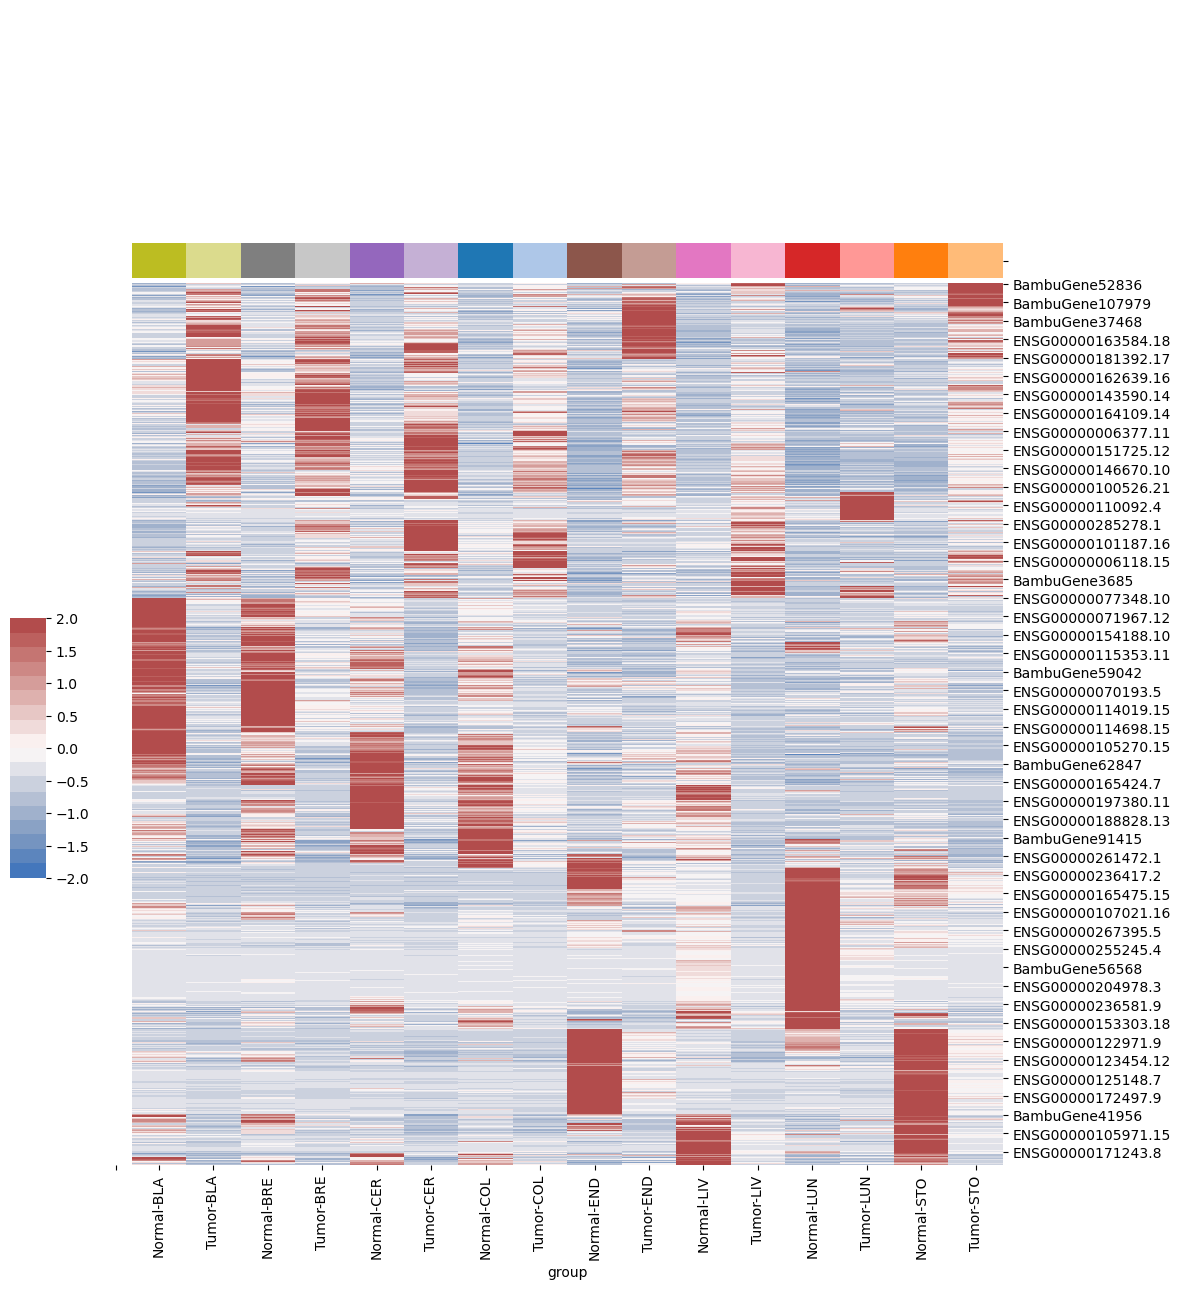

In [613]:
g = sns.clustermap(mean_330_data.T, center=0, 
                   cmap=sns.color_palette("vlag",18),
                   # cmap=sns.color_palette("vlag",21)[6:15],
                       row_colors=colors,
                       col_colors=colors,
                       # row_cluster=False, 
                       col_cluster=False,
                       # metric='correlation',
                       metric='euclidean',
                       z_score=0,
                       vmin=-2,
                       vmax=2,
                       method="ward",#更改cluster方式
                       dendrogram_ratio=(.1, .2),
                       cbar_pos=(.02, .32, .03, .2),#mask=True,
                       figsize=(12, 13)#, cbar_kws=group['Sample']
                      )
g.ax_row_dendrogram.remove()
plt.savefig ("/data1/DYY/bambu/plot/figure2/2c_288samples_mean_330-filter_ward_correlation_clustermap.pdf", format='pdf', dpi=400)

# 5b

In [200]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import random
import os
from matplotlib.patches import Patch

In [198]:
def color_func(cm, list1):
    pal = sns.color_palette(palette=cm)
    lut = dict(zip(set(list1), pal))
    # list1 = list(group.sort_values('Group')['Group'].unique())
    # colors = pd.Series(list1, index=list1).map(lut)
    return lut

In [204]:
p_df = pd.read_csv('/data1/DYY/bambu/288_mstrg_tpm/all_trans_padj.csv',sep='\t',index_col=0)

In [205]:
sig_ir = p_df.loc[p_df[p_df<0.05].count(axis=1)>0]

In [208]:
ir_path = '/data1/DYY/bambu/288_mstrg_tpm/'
files = [x for x in os.listdir(ir_path) if len(x)==7]
ir_df = pd.DataFrame()
for f in files:
    tis = files[:3]
    ir_data = pd.read_csv('/data1/DYY/bambu/288_mstrg_tpm/'+f,sep='\t',index_col=0)
    try:
        ir_df = pd.concat([ir_df,ir_data],axis=1)
    except:
        ir_df = ir_data.copy()
    # break

In [209]:
ir_sig_df = ir_df.loc[sig_ir.index]

In [210]:
test = ir_df.T.reset_index().rename(columns={'index':'name'}).merge(group)
df = test.sort_values('Sample ID')
normal = df.loc[df.Type == 'Normal'].set_index('Sample ID')
tumor = df.loc[df.Type == 'Tumor'].set_index('Sample ID')

In [211]:
normal = normal.loc[normal.index.isin(tumor.index)]
tumor = tumor.loc[tumor.index.isin(normal.index)]
sum(tumor.index == normal.index)
nor = normal.drop(['Group','Type','name','Type','tissue'],axis=1)
tur = tumor.drop(['name','Group','name','Type','tissue'],axis=1)

In [212]:
diff = tur - nor

In [286]:
diff.T.to_csv('/data1/DYY/bambu/288_ir_ratio_t-n.csv',sep='\t')

In [213]:
NOR = nor.T
TUR = tur.T
NOR.columns = NOR.columns + "_N"
TUR.columns = TUR.columns + '_T'
NOR= NOR.astype(float)
TUR = TUR.astype(float)
RATIO_CORR = pd.concat([NOR,TUR],axis=1).corr()

In [246]:
color_group = pd.read_csv('/data1/DYY/data/group.csv',sep='\t')

In [248]:
order = color_group['Sample ID'].str[:3].drop_duplicates().tolist()

In [268]:
group_info = pd.Series([x[:3] for x in RATIO_CORR.index],index=RATIO_CORR.columns.tolist())
tissue_info = pd.Series([x[-1] for x in RATIO_CORR.columns.tolist()],index=RATIO_CORR.columns.tolist())

/home/bwu4/anaconda3/envs/NEW/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bwu4/anaconda3/envs/NEW/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


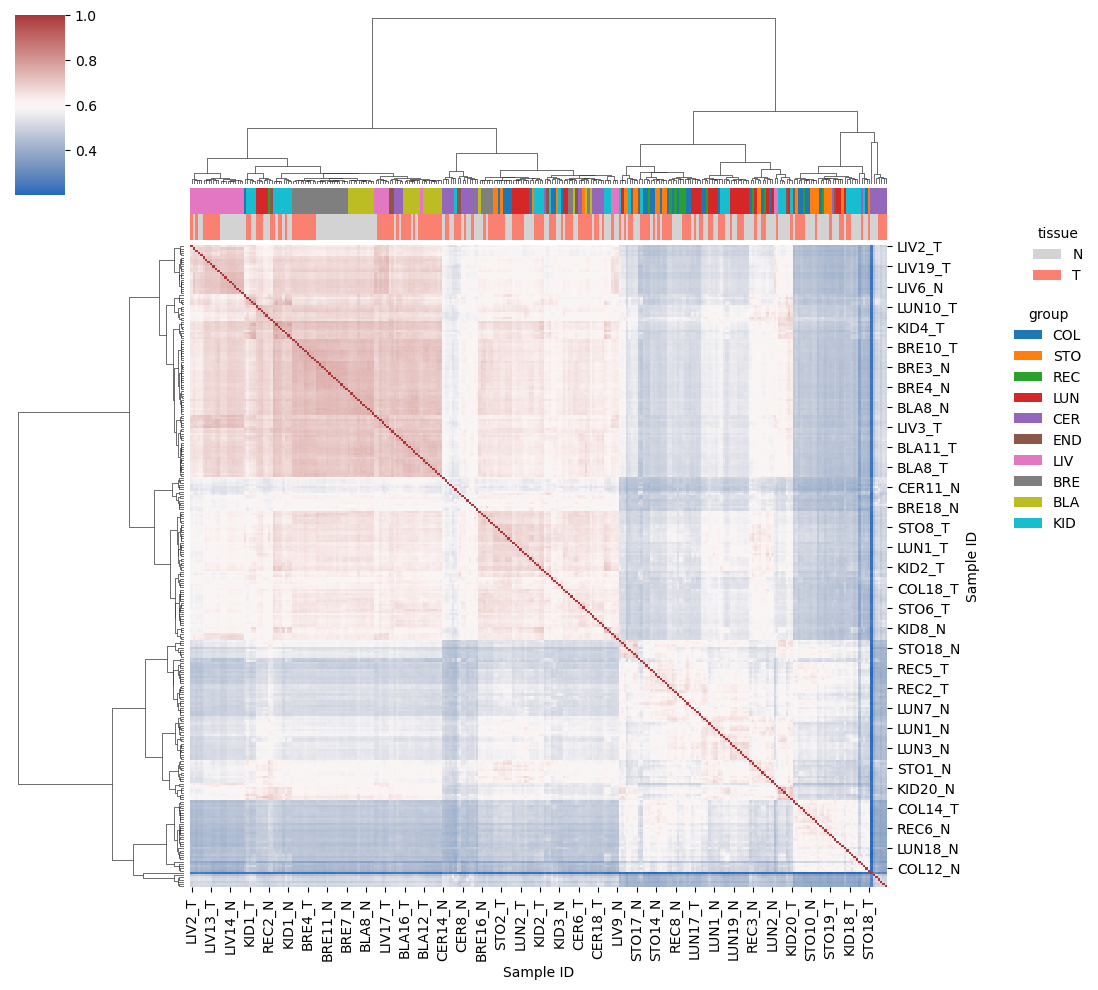

In [280]:

lut_tissue = {"N": (211/255,211/255,211/255), "T": (250/255,128/255,114/255)}
tissue_colors = tissue_info.map(lut_tissue)
# lut_group=color_func('tab10',group_info)
group_colors=group_info.map(ten_colors.to_dict())

g = sns.clustermap(RATIO_CORR,
                   # z_score=0,
                   # vmin=0.45,vmax=0.85,
                   method='ward',
                   cmap='vlag',
               col_colors=[group_colors,tissue_colors]
              )
handles_group = [Patch(facecolor=lut_group[name]) for name in lut_group]
group_legend = g.fig.legend(handles_group, ten_colors.to_dict(), title='group',bbox_to_anchor=(1.1, 0.7), bbox_transform=plt.gcf().transFigure, loc='upper right',frameon=False)
handles_tissue = [Patch(facecolor=lut_tissue[name]) for name in lut_tissue]
tissue_legend = g.fig.legend(handles_tissue, lut_tissue, title='tissue',bbox_to_anchor=(1.1, 0.7), bbox_transform=plt.gcf().transFigure, loc='lower right',frameon=False)
# plt.gca().add_artist(group_legend)  # 确保第一个图例不被覆盖
# plt.gca().add_artist(tissue_legend)
# plt.show()
plt.savefig('/data1/DYY/bambu/plot/all_iso_1122RATIO_CORR_CLUSTERMA.pdf', dpi=400,bbox_inches='tight')

In [884]:
ratio_corr = pd.concat([NOR,TUR],axis=1).corr()
RATIO_CORR_STACK = ratio_corr.stack()
RATIO_CORR_STACK.index.names = ['SAMP1', 'SAMP2']
RATIO_CORR_STACK = RATIO_CORR_STACK.reset_index()
RATIO_CORR_STACK = RATIO_CORR_STACK.loc[(RATIO_CORR_STACK.SAMP1 != RATIO_CORR_STACK.SAMP2) & (RATIO_CORR_STACK.SAMP1.str[0:3] == RATIO_CORR_STACK.SAMP2.str[0:3]) & (RATIO_CORR_STACK.SAMP1.str[-1] == RATIO_CORR_STACK.SAMP2.str[-1])]

In [885]:
RATIO_CORR_STACK['Tissue'] = RATIO_CORR_STACK.SAMP1.str[0:3]
RATIO_CORR_STACK['N1'] = RATIO_CORR_STACK['SAMP1'].str[3:-2].astype(int)
RATIO_CORR_STACK['N2'] = RATIO_CORR_STACK['SAMP2'].str[3:-2].astype(int)
RATIO_CORR_STACK['TYPE'] = RATIO_CORR_STACK['SAMP2'].str[-1]

In [886]:
RATIO_CORR_TUR_ALL = ratio_corr.loc[ratio_corr.index.str.contains('_T')]
# RATIO_CORR_TUR_ALL = RATIO_CORR_TUR_ALL.reset_index()
# RATIO_CORR_TUR_ALL.loc[:,'Sample ID'] = RATIO_CORR_TUR_ALL['Sample ID'].str[:3]+'_'+RATIO_CORR_TUR_ALL['Sample ID'].str.split('_',expand=True).iloc[:,-1]
# RATIO_CORR_TUR_ALL = RATIO_CORR_TUR_ALL.set_index('Sample ID').T.reset_index()
# RATIO_CORR_TUR_ALL.loc[:,'Sample ID'] = RATIO_CORR_TUR_ALL['Sample ID'].str[:3]+'_'+RATIO_CORR_TUR_ALL['Sample ID'].str.split('_',expand=True).iloc[:,-1]
# RATIO_CORR_TUR_ALL = RATIO_CORR_TUR_ALL.set_index('Sample ID').T

In [887]:
from matplotlib.colors import LinearSegmentedColormap

In [813]:
# cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['lime', 'crimson'])

In [875]:
nor.loc['STO19']

BambuTx5             0.119048
BambuTx7             0.000000
BambuTx10            0.000000
BambuTx12            0.352978
BambuTx19            0.047336
                       ...   
ENST00000706299.1    0.000000
ENST00000706301.1    0.000000
ENST00000706321.1    0.000000
ENST00000706365.1    0.000000
ENST00000706366.1    0.000000
Name: STO19, Length: 31557, dtype: float64

In [877]:
nor.loc[nor.index.str.contains('STO')]

,BambuTx5,BambuTx7,BambuTx10,BambuTx12,BambuTx19,BambuTx20,BambuTx21,BambuTx22,BambuTx23,BambuTx24,...,ENST00000706204.1,ENST00000706206.1,ENST00000706247.1,ENST00000706263.1,ENST00000706292.1,ENST00000706299.1,ENST00000706301.1,ENST00000706321.1,ENST00000706365.1,ENST00000706366.1
Sample ID,,,,,,,,,,,,,,,,,,,,,
STO1,0.200000,0.000000,0.000000,0.142857,0.230706,0.226961,0.070650,0.044629,0.114372,0.444445,...,0.000000,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
STO10,0.000000,0.141404,0.000000,0.538462,0.054600,0.000000,0.104150,0.019407,0.000000,0.166667,...,0.000000,0.000000,0.436551,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
STO12,0.000000,0.000000,0.000000,0.100000,0.095937,0.000000,0.055623,0.015166,0.250000,0.000000,...,0.000000,0.111111,0.100000,0.0,0.0,0.000000,0.0,0.222222,0.0,0.00000
STO14,0.000000,0.000000,0.000000,0.166784,0.059786,1.000000,0.158519,0.023417,0.000000,0.000000,...,0.049488,0.166666,0.352927,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
STO15,0.259259,0.000000,0.000000,0.214178,0.016167,0.000000,0.071272,0.127328,0.057402,0.333333,...,0.000000,0.000000,0.521739,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
STO16,0.000000,0.140184,0.000000,0.086957,0.040859,0.000000,0.019556,0.049671,0.034315,0.250000,...,0.000000,0.400000,0.000000,0.0,0.0,0.000000,0.0,0.285714,0.0,0.00000
STO17,0.000000,0.280890,0.000000,0.142857,0.081134,0.000000,0.126642,0.000000,0.060345,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.307692,0.0,0.00000
STO18,0.714286,0.000000,0.000000,0.000000,0.021667,0.000000,0.091897,0.000000,0.172500,0.222222,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.307692,0.0,0.00000
STO19,0.119048,0.000000,0.000000,0.352978,0.047336,0.000000,0.032135,0.055556,0.000000,0.428571,...,0.067444,0.035714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000


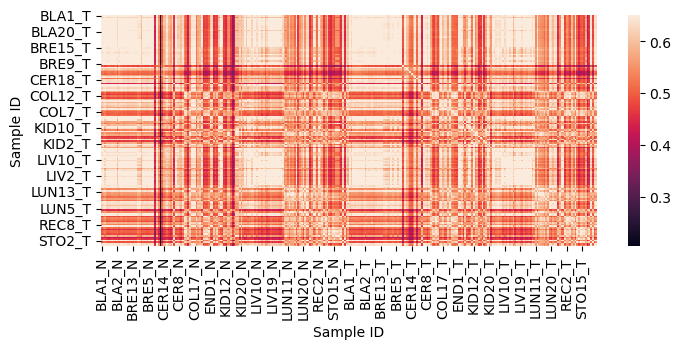

In [899]:
plt.figure(figsize=(8,3))
ax = sns.heatmap(RATIO_CORR_TUR_ALL, vmax=0.65)
# plt.legend(handles, lut, title='group',bbox_to_anchor=(1.1, 0.9), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig("/data1/DYY/bambu/plot/figure5/1118RATIO_CORR_heatmap.pdf", dpi=300)
plt.show()

# 5c

In [905]:
convert = pd.read_csv('/data1/DYY/bambu/CPM_transcript.txt',sep='\t')

In [907]:
convert = convert.loc[convert.GENEID.str.startswith('ENSG')]

In [911]:
convert = convert[['TXNAME','GENEID']]

In [52]:
gencode['GENEID'] = gencode[8].str.split(';',expand=True).iloc[:,0].str.split('"',expand=True).iloc[:,1]

In [60]:
gencode[['GENEID','gene_name']].to_csv('/data1/DYY/bambu/geneid_gene_name.csv',sep='\t',index=False)

In [56]:
gencode['gene_name'] = gencode[8].str.split(';',expand=True).iloc[:,2].str.split('"',expand=True).iloc[:,1]

In [46]:
gencode = pd.read_csv('/mnt/sdc1/ref/gencodev42/gencode.v42.annotation.gtf',skiprows=5,header=None,sep='\t')

In [47]:
gencode = gencode.loc[gencode[2]=='gene']

In [923]:
gencode['gene_type'] = gencode[8].str.split(';',expand=True).iloc[:,1].str.split('"',expand=True).iloc[:,1]

In [925]:
gencode = gencode.loc[gencode.gene_type=='protein_coding']

In [929]:
gencode['ensg'] = gencode[8].str.split(';',expand=True).iloc[:,0].str.split('"',expand=True).iloc[:,1]

/tmp/ipykernel_745546/2751417414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gencode['ensg'] = gencode[8].str.split(';',expand=True).iloc[:,0].str.split('"',expand=True).iloc[:,1]


In [301]:
gencode.loc[gencode[8].str.contains('ENST00000222330.8')]

,0,1,2,3,4,5,6,7,8
3033648,chr19,HAVANA,transcript,42230190,42242602,.,-,.,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033649,chr19,HAVANA,exon,42242183,42242602,.,-,.,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033650,chr19,HAVANA,CDS,42242183,42242465,.,-,0,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033651,chr19,HAVANA,start_codon,42242463,42242465,.,-,0,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033652,chr19,HAVANA,exon,42239955,42240142,.,-,.,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033653,chr19,HAVANA,CDS,42239955,42240142,.,-,2,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033654,chr19,HAVANA,exon,42236858,42236941,.,-,.,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033655,chr19,HAVANA,CDS,42236858,42236941,.,-,0,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033656,chr19,HAVANA,exon,42236606,42236716,.,-,.,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."
3033657,chr19,HAVANA,CDS,42236606,42236716,.,-,0,"gene_id ""ENSG00000105723.13""; transcript_id ""E..."


In [933]:
coding_gene = gencode.ensg.tolist()

In [1175]:
sig_ir = sig_ir.reset_index().rename(columns={'transcript':'TXNAME'}).merge(convert)

In [1191]:
sum_data = sig_ir.drop(['TXNAME','GENEID'],axis=1)
sum_known_data = sig_ir.loc[sig_ir.TXNAME.str.contains('ENST')].drop(['TXNAME','GENEID'],axis=1)
sum_df = pd.concat([pd.DataFrame(sum_data[sum_data<0.01].count()),pd.DataFrame(sum_known_data[sum_known_data<0.01].count())],axis=1)
sum_df.columns=['all','known']
sum_df = sum_df.sort_index()
sum_df = sum_df.reset_index().rename(columns={"index":'tissue'})
sum_df['unknown'] = sum_df['all'] - sum_df['known']

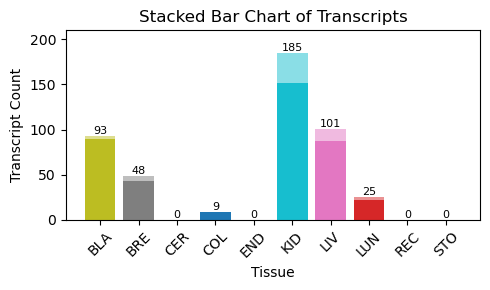

In [1193]:
# 添加计数标注到堆叠柱状图中
plt.figure(figsize=(5, 3))
for idx, tissue in enumerate(sum_df['tissue']):
    # 绘制已知部分的柱状图
    plt.bar(tissue, sum_df.loc[idx, 'known'], color=ten_colors[tissue], label=f'{tissue} Known' if idx == 0 else "")
    # 绘制未知部分的柱状图
    plt.bar(tissue, sum_df.loc[idx, 'unknown'], bottom=sum_df.loc[idx, 'known'], color=ten_colors[tissue], alpha=0.5, label=f'{tissue} Unknown' if idx == 0 else "")
    # 在柱状图上方标注总值
    total = sum_df.loc[idx, 'all']
    plt.text(tissue, total, str(total), ha='center', va='bottom', fontsize=8)

# 添加图例、标签和标题
plt.xlabel('Tissue')
# plt.ylim(0,460)
plt.ylim(0,210)
plt.ylabel('Transcript Count')
plt.title('Stacked Bar Chart of Transcripts')
plt.xticks(rotation=45)

# 保存图像
plt.tight_layout()
plt.savefig('/data1/DYY/bambu/plot/figure5/5c_padj0.01.pdf', dpi=400)

# 显示图像
plt.show()


# 5e

In [1560]:
padj = pd.read_csv('/data1/DYY/bambu/288_mstrg_tpm/all_trans_padj.csv', sep='\t',index_col=0)
padj = padj.loc[padj.index.isin(sig_ir.TXNAME)]
# padj = pd.read_csv('/data1/DYY/data/1129isoform_ratio/all_trans_p_adj.csv', sep='\t',index_col=0)
padj_dict = {}
for column in padj.columns:
    padj_dict[column] = padj[padj[column]<0.05][[column]]

In [1216]:
normal_group = group[group.Type=='Normal']

In [1218]:
tumor_group = group[group.Type=='Tumor']

In [1329]:

desgene_dict = {}
for column in padj.columns:
    desgene = pd.read_csv(f'/data1/DYY/bambu/288_desgene_df/{column}.csv',sep='\t',index_col=0)
    df = pd.DataFrame(index = gencode.ensg)
    # df.loc[df.index.isin(desgene[(desgene.padj<0.05) & (desgene.log2FoldChange>1)].index),'up'] = 1
    # df.loc[df.index.isin(desgene[(desgene.padj<0.05) & (desgene.log2FoldChange<-1)].index),'down'] = 1
    df = pd.concat([df,desgene],axis=1)
    df = df[df.count(axis=1)>0]
    # # desgene = desgene_data[desgene_data['sums']>0][['ensg']]
    desgene_dict[column] = df.reset_index().rename(columns={'index':'GENEID'})
    # break

In [1347]:
up_down_df = pd.DataFrame(index=['up','down','other'])
con_div_df = pd.DataFrame(index=['con','sca','other'])
for k in padj_dict.keys():
    sig_gene = padj_dict[k].reset_index().rename(columns={'transcript':'TXNAME'}).merge(convert).drop_duplicates()
    merge_df = sig_gene.merge(desgene_dict[k],how='left')
    up_down = pd.DataFrame(merge_df.sum()[['up','down']], columns=[k])
    up_down.loc['other',:] = len(merge_df)-up_down.sum()[0]
    up_down_df = up_down_df.merge(up_down,left_index=True,right_index=True)
    try:
        con_div = pd.DataFrame(merge_df.sum()[['con','sca']], columns=[k])
        con_div.loc['other',:] = len(merge_df)-con_div.sum()[0]
        con_div_df = con_div_df.merge(con_div,left_index=True,right_index=True)
    except:
        con_div_df.loc[:,k] = 0
    # break

In [1361]:
padj_dict.keys()

dict_keys(['BLA', 'REC', 'COL', 'END', 'LUN', 'BRE', 'KID', 'STO', 'LIV', 'CER'])

In [1422]:
test.T.sort_index().T

,BLA,BRE,CER,COL,END,KID,LIV,LUN,REC,STO
up,0.03066,0.093656,NaN,0.238095,NaN,0.121359,0.149533,0.082192,NaN,NaN
down,0.424528,0.18429,NaN,0.396825,NaN,0.381068,0.327103,0.232877,NaN,NaN
other,0.544811,0.722054,NaN,0.365079,NaN,0.497573,0.523364,0.684932,NaN,NaN


/tmp/ipykernel_745546/2973722472.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)
/tmp/ipykernel_745546/2973722472.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)


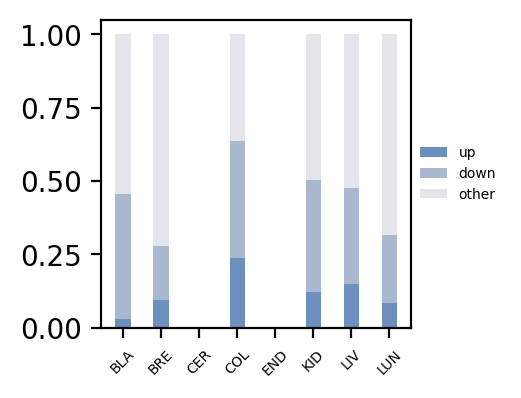

In [1424]:
fig,ax = plt.subplots(figsize=(2,2),dpi=200)

# label = [i for i in up_down_df.columns]
width = .4
n = 1
# colors_template = ['#de534d','#f9a664', '#fdea9f', '#edf9a9', '#a4d9a7', '#4e9fb2','#1f5877'][::-1]
colors_template = ['#6d8fbf','#a9b8cf','#e4e4ea']
# colors_template = sns.color_palette("Spectral")
# bar_data = bar_data.reindex(["SE", "A3", "A5", "AF","RI", "AL","MX"])
test = up_down_df/up_down_df.sum()
test = test.T.sort_index().T
label = [i for i in test.columns]
subategory = up_down_df.index
ax.bar(label, test.iloc[0,:].values, width, label=subategory[0],color=colors_template[0])
for l in range(2):
    ax.bar(label, test.iloc[n,:].values, width, bottom=test.iloc[:n,:].sum(), label=subategory[n],color=colors_template[n])
    n+=1
    ax.legend(fontsize=5,frameon=False,loc='center',ncol=1,bbox_to_anchor=(1.15, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)
plt.savefig('/data1/DYY/bambu/plot/figure5/ir_sig_up_up_down.pdf',format='pdf',bbox_inches='tight')

/tmp/ipykernel_745546/4166290066.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)
/tmp/ipykernel_745546/4166290066.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)


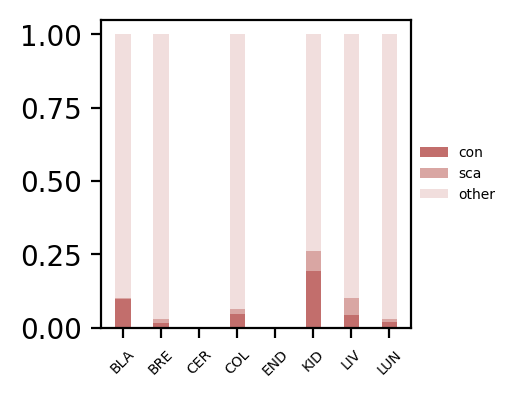

In [1426]:
fig,ax = plt.subplots(figsize=(2,2),dpi=200)

width = .4
n = 1
colors_template = ['#c26e6c','#d9a6a3', '#f1dedd']
test_con = con_div_df/con_div_df.sum()
test_con = test_con.T.sort_index().T
label = [i for i in test_con.columns]
# colors_template = sns.color_palette("Spectral")
# bar_data = bar_data.reindex(["SE", "A3", "A5", "AF","RI", "AL","MX"])
subategory = con_div_df.index
ax.bar(label, test_con.iloc[0,:].values, width, label=subategory[0],color=colors_template[0])
for l in range(2):
    ax.bar(label, test_con.iloc[n,:].values, width, bottom=test_con.iloc[:n,:].sum(), label=subategory[n],color=colors_template[n])
    n+=1
    ax.legend(fontsize=5,frameon=False,loc='center',ncol=1,bbox_to_anchor=(1.15, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=5)
plt.savefig('/data1/DYY/bambu/plot/figure5/ir_sig_con_div.pdf',format='pdf',bbox_inches='tight')

# 5f data

In [1374]:
ensg = pd.read_csv('/data1/DYY/data/ensg_gene_name.csv',sep='\t')

In [1386]:
ensg = ensg.rename(columns={'1':'GENEID','7':'gene_name'}).drop_duplicates()

In [1390]:
ensg_gene_name = pd.merge(ensg,convert)

In [1472]:
ir_sig_gene = padj.reset_index().rename(columns={'transcript':'TXNAME'}).merge(convert)['GENEID'].str.split('.',expand=True).iloc[:,0].tolist()

In [1474]:
with open('/data1/DYY/bambu/288_ir_sig_gene.txt','w') as f:
    for item in ir_sig_gene:
        f.write(f'{item}\n')

In [1484]:
ir_sig_diff = diff.loc[:,padj.index]

In [1498]:
ir_sig_diff_count = ir_sig_diff[ir_sig_diff>0].reset_index().merge(group).drop(['Sample ID','Type','Group'],axis=1).groupby('tissue').count()

In [ ]:
ir_sig_up_tx = ir_sig_diff_count.loc[:,ir_sig_diff_count.apply(lambda x:x>0.5*x['name'],axis=1).sum()>0].drop('name',axis=1).columns.tolist()
ir_sig_up_tx = pd.DataFrame(ir_sig_up_tx)
ir_sig_up_tx = ir_sig_up_tx.loc[ir_sig_up_tx[0].str.startswith('ENST')]
ir_sig_up_tx = ir_sig_up_tx.rename(columns={0:'TXNAME'}).merge(convert)[['GENEID']]
ir_sig_up_tx['GENEID'] = ir_sig_up_tx['GENEID'].str.split('.',expand=True).iloc[:,0]
ir_sig_up_tx.to_csv('/data1/DYY/bambu/ir_sig_up_gene.csv',header=False,index=False)

In [1566]:
padj_df = padj[padj<0.05]

In [1587]:
test =padj_df.loc[(padj_df.count(axis=1)>2)]#.reset_index().rename(columns={'transcript':'TXNAME'}).merge(convert).drop('GENEID',axis=1).set_index('GENEID')

In [1589]:
p_value_t = pd.DataFrame(index=test.index,columns=test.columns)

In [1591]:
for k in group.tissue.drop_duplicates():
    p = padj_dict[k].loc[padj_dict[k].index.isin(test.index)]
    p_value_t.loc[p.index,k] = p[k].tolist()

In [ ]:
ir_path = '/data1/DYY/bambu/288_mstrg_tpm/'
files = [x for x in os.listdir(ir_path) if len(x)==7]
ir_df = pd.DataFrame()
for f in files:
    tis = files[:3]
    ir_data = pd.read_csv('/data1/DYY/bambu/288_mstrg_tpm/'+f,sep='\t',index_col=0)
    try:
        ir_df = pd.concat([ir_df,ir_data],axis=1)
    except:
        ir_df = ir_data.copy()
    break

In [ ]:
ir_data

In [1613]:
ir_data.T.reset_index().rename(columns={'index':'name'}).merge(group)

,name,BambuTx1,BambuTx3,BambuTx4,BambuTx5,BambuTx6,BambuTx7,BambuTx8,BambuTx9,BambuTx10,...,ENST00000706428.1,ENST00000706429.1,ENST00000706430.1,ENST00000706431.1,ENST00000706486.1,ENST00000706487.1,Type,Sample ID,tissue,Group
0,A1701405J10TN1,0.0,0.000000,0.100000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Normal,CER1,CER,Normal-CER
1,A1701405J10TT1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Tumor,CER1,CER,Tumor-CER
2,A1701410J10TN1,0.0,0.000000,0.750000,0.133333,0.000000,0.000000,0.000000,0.0,0.006623,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Normal,CER2,CER,Normal-CER
3,A1701410J10TT1,0.0,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.032709,Tumor,CER2,CER,Tumor-CER
4,A1701415J10TN1,1.0,0.117070,0.240897,0.270565,0.118394,0.000000,0.047331,1.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Normal,CER4,CER,Normal-CER
5,A1701415J10TT1,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Tumor,CER4,CER,Tumor-CER
6,A1701416J10TN1,0.0,0.000000,0.256385,0.000000,0.000000,0.200000,0.000000,1.0,0.003294,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Normal,CER5,CER,Normal-CER
7,A1701416J10TT1,0.0,0.000000,0.208564,0.444444,0.000000,0.250000,0.032006,0.0,0.003106,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Tumor,CER5,CER,Tumor-CER
8,A1701420J10TN1,0.0,0.159244,0.000000,0.125000,0.000000,0.333333,0.046607,0.0,0.008379,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Normal,CER6,CER,Normal-CER
9,A1701420J10TT1,1.0,0.253721,1.000000,0.166666,0.000000,0.200000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,Tumor,CER6,CER,Tumor-CER


In [1597]:
p_value_t.reset_index().rename(columns={'transcript':'TXNAME'}).merge(ensg_gene_name).set_index('gene_name').drop(['TXNAME','GENEID'],axis=1).to_csv('/data1/DYY/bambu/ir_sig_dotplot_data_figure4/p_value.csv',sep='\t')

In [1599]:
test

,BLA,REC,COL,END,LUN,BRE,KID,STO,LIV,CER
transcript,,,,,,,,,,
BambuTx1708,NaN,NaN,NaN,NaN,0.011313,0.016495,NaN,NaN,0.020034,NaN
BambuTx655,0.015654,NaN,NaN,NaN,NaN,0.025190,0.016361,NaN,NaN,NaN
BambuTx720,0.025759,NaN,NaN,NaN,0.008059,0.029382,NaN,NaN,NaN,NaN
ENST00000193403.10,0.000824,NaN,0.010154,NaN,NaN,0.008686,NaN,NaN,NaN,NaN
ENST00000242208.5,0.011897,NaN,NaN,NaN,NaN,0.001941,NaN,NaN,0.037362,NaN
ENST00000245816.11,0.002801,NaN,NaN,NaN,0.043835,NaN,NaN,NaN,0.019071,NaN
ENST00000249842.8,0.035761,NaN,0.000482,NaN,NaN,0.008162,NaN,NaN,NaN,NaN
ENST00000263805.8,0.000672,NaN,NaN,NaN,0.001909,0.049513,NaN,NaN,NaN,NaN
ENST00000280362.8,0.010838,NaN,NaN,NaN,0.001524,0.022773,NaN,NaN,NaN,NaN


In [ ]:
test.reset_index().merge(gene_name).set_index('gene_name').drop(['transcript','ensg','mstrg'],axis=1).to_csv('/data1/DYY/data/ir_sig_dotplot_data_figure4/test_tumor.csv',sep='\t')
testn.reset_index().merge(gene_name).set_index('gene_name').drop(['transcript','ensg','mstrg'],axis=1).to_csv('/data1/DYY/data/ir_sig_dotplot_data_figure4/test_normal.csv',sep='\t')


# 3b

In [5]:
import os
import pandas as pd

In [7]:
cpm = pd.read_csv('/data1/DYY/bambu/CPM_transcript.txt',sep='\t',index_col=0)

In [27]:
group = pd.read_csv('/data1/DYY/bambu/288_group.csv',sep='\t')
group['tissue'] = group['Sample ID'].str[:3]

In [21]:
suppa_df = pd.DataFrame(index=suppa.index,columns=suppa.columns,data=0)
for s in os.listdir('/data1/DYY/bambu/288_normal_trans_suppa_types/'):
    sup = s[:2]
    suppa = pd.read_csv('/data1/DYY/bambu/288_normal_trans_suppa_types/'+s,index_col=0).fillna(0).astype(int)
    # print(suppa.head())
    # break
    try:
        suppa_df = suppa_df+suppa
    except:
        suppa_df = suppa.copy()
    # break
    # suppa_df.loc[:,sup]=suppa.sum()

In [23]:
mono_change = suppa_df[suppa_df==1]

In [29]:
suppa_sum = pd.DataFrame()
for t in group.tissue.drop_duplicates():
    mono_trans = mono_change.loc[mono_change[t]==1].index.tolist()
    for s in os.listdir('/data1/DYY/bambu/288_normal_trans_suppa_types/'):
        sup = s[:2]
        suppa = pd.read_csv('/data1/DYY/bambu/288_normal_trans_suppa_types/'+s,index_col=0).fillna(0).astype(int)
        count = suppa.loc[mono_trans].sum()[t]
        suppa_sum.loc[sup,t] = count

In [30]:
suppa_sum = suppa_sum.sort_values('BLA',ascending=False)

In [31]:
suppa_sum

,BLA,BRE,CER,COL,END,STO,LIV,LUN,REC,KID
AF,19649.0,19794.0,19668.0,19723.0,19738.0,19708.0,19727.0,19787.0,19500.0,19653.0
SE,17839.0,17637.0,17693.0,17814.0,17851.0,17543.0,17417.0,17802.0,17971.0,17709.0
A5,16358.0,16530.0,16615.0,16546.0,16519.0,16634.0,16617.0,16528.0,16291.0,16465.0
A3,14362.0,14315.0,13817.0,13905.0,13817.0,13837.0,14066.0,14021.0,14003.0,13988.0
AL,6825.0,6911.0,6979.0,6961.0,7006.0,7019.0,6918.0,6930.0,6918.0,6903.0
RI,3800.0,3808.0,3669.0,3724.0,3609.0,3653.0,3706.0,3728.0,3699.0,3730.0
MX,659.0,646.0,645.0,667.0,674.0,687.0,647.0,669.0,671.0,648.0


In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# 创建 viridis colormap 的浅色部分
viridis = plt.cm.get_cmap("viridis")  # 获取 viridis colormap
new_viridis = mcolors.ListedColormap(viridis(np.linspace(0.2, 1, 256)))  # 只取浅色部分


/tmp/ipykernel_882324/2238292968.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap("viridis")  # 获取 viridis colormap


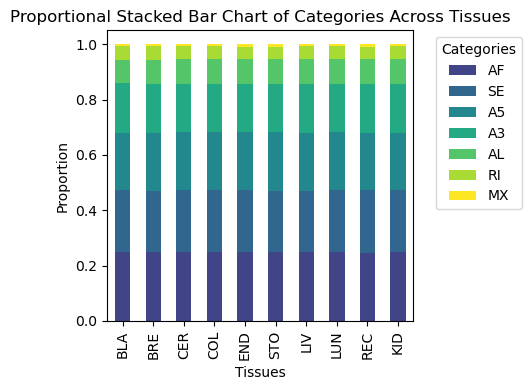

In [41]:
df_normalized = suppa_sum.div(suppa_sum.sum(axis=0), axis=1)

# 绘制堆叠柱状图
df_normalized.T.plot(kind='bar', stacked=True, figsize=(5,4),cmap=new_viridis)

# 图形美化
plt.title('Proportional Stacked Bar Chart of Categories Across Tissues')
plt.ylabel('Proportion')
plt.xlabel('Tissues')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/data1/DYY/bambu/plot/figure3/3e_1127.pdf',dpi=400)

# 3e

In [304]:
ts_all = pd.read_csv('/data1/DYY/bambu/288_count_matrix_deseq2/all_trans_norm.counts.fn',sep='\t')

In [310]:
ts_all = ts_all.T.reset_index().rename(columns={'index':'name'}).merge(group[['name','Type']])

In [312]:
ts_all_n = ts_all.loc[ts_all.Type=='Normal'].drop('Type',axis=1).set_index('name')
ts_all_t = ts_all.loc[ts_all.Type=='Tumor'].drop('Type',axis=1).set_index('name')


In [320]:
nor_non = ts_all_n.loc[:,ts_all_n[ts_all_n<0.05].count()==144].columns.tolist()

In [322]:
ts_all_t = ts_all_t.loc[:,nor_non]

In [338]:
ts_all_trans = ts_all_t.loc[:,ts_all_t[ts_all_t<0.05].count()<142].T.reset_index()[['index']].rename(columns={'index':'TXNAME'})

In [348]:
ts_all_df = ts_all_trans.merge(cpm.reset_index()[['TXNAME','GENEID']])

In [350]:
ts_all_df = ts_all_df.loc[ts_all_df.GENEID.str.startswith('ENS')]

In [358]:
ts_all_df.GENEID.str.split('.',expand=True).iloc[:,0].to_csv('/data1/DYY/bambu/all_ts_gene.csv',index=False,header=False)

# 6c plot data

In [289]:
hierarc = pd.read_csv('/data1/DYY/bambu/grade_df_with_tcga.csv',sep='\t',index_col=0)

In [290]:
hierarc[hierarc.score>6].reset_index().ensg.str.split('.',expand=True).iloc[:,0]

0      ENSG00000119772
1      ENSG00000185567
2      ENSG00000037280
3      ENSG00000109670
4      ENSG00000007237
            ...       
355    ENSG00000104447
356    ENSG00000185624
357    ENSG00000168610
358    ENSG00000142687
359    ENSG00000100162
Name: 0, Length: 360, dtype: object

In [293]:
with open('/data1/DYY/bambu/6c_highest_plot_data.txt','w') as f:
    for item in hierarc[hierarc.score>6].reset_index().ensg.str.split('.',expand=True).iloc[:,0].tolist():
        f.write(f'{item}\n')

In [109]:
type_df = pd.read_csv('/data1/DYY/bambu/grade_df_with_tcga_type.csv',sep='\t',index_col=0)

In [110]:
test_type_df = type_df.loc[hierarc.loc[(hierarc.score>=6) & (hierarc.score<9)].gene_name]
test_type_df = test_type_df.loc[test_type_df[test_type_df=='isoform_spec'].count(axis=1)>1]
test_type_df = test_type_df.replace('desgene',1)
test_type_df = test_type_df.replace('isoform_spec',0)

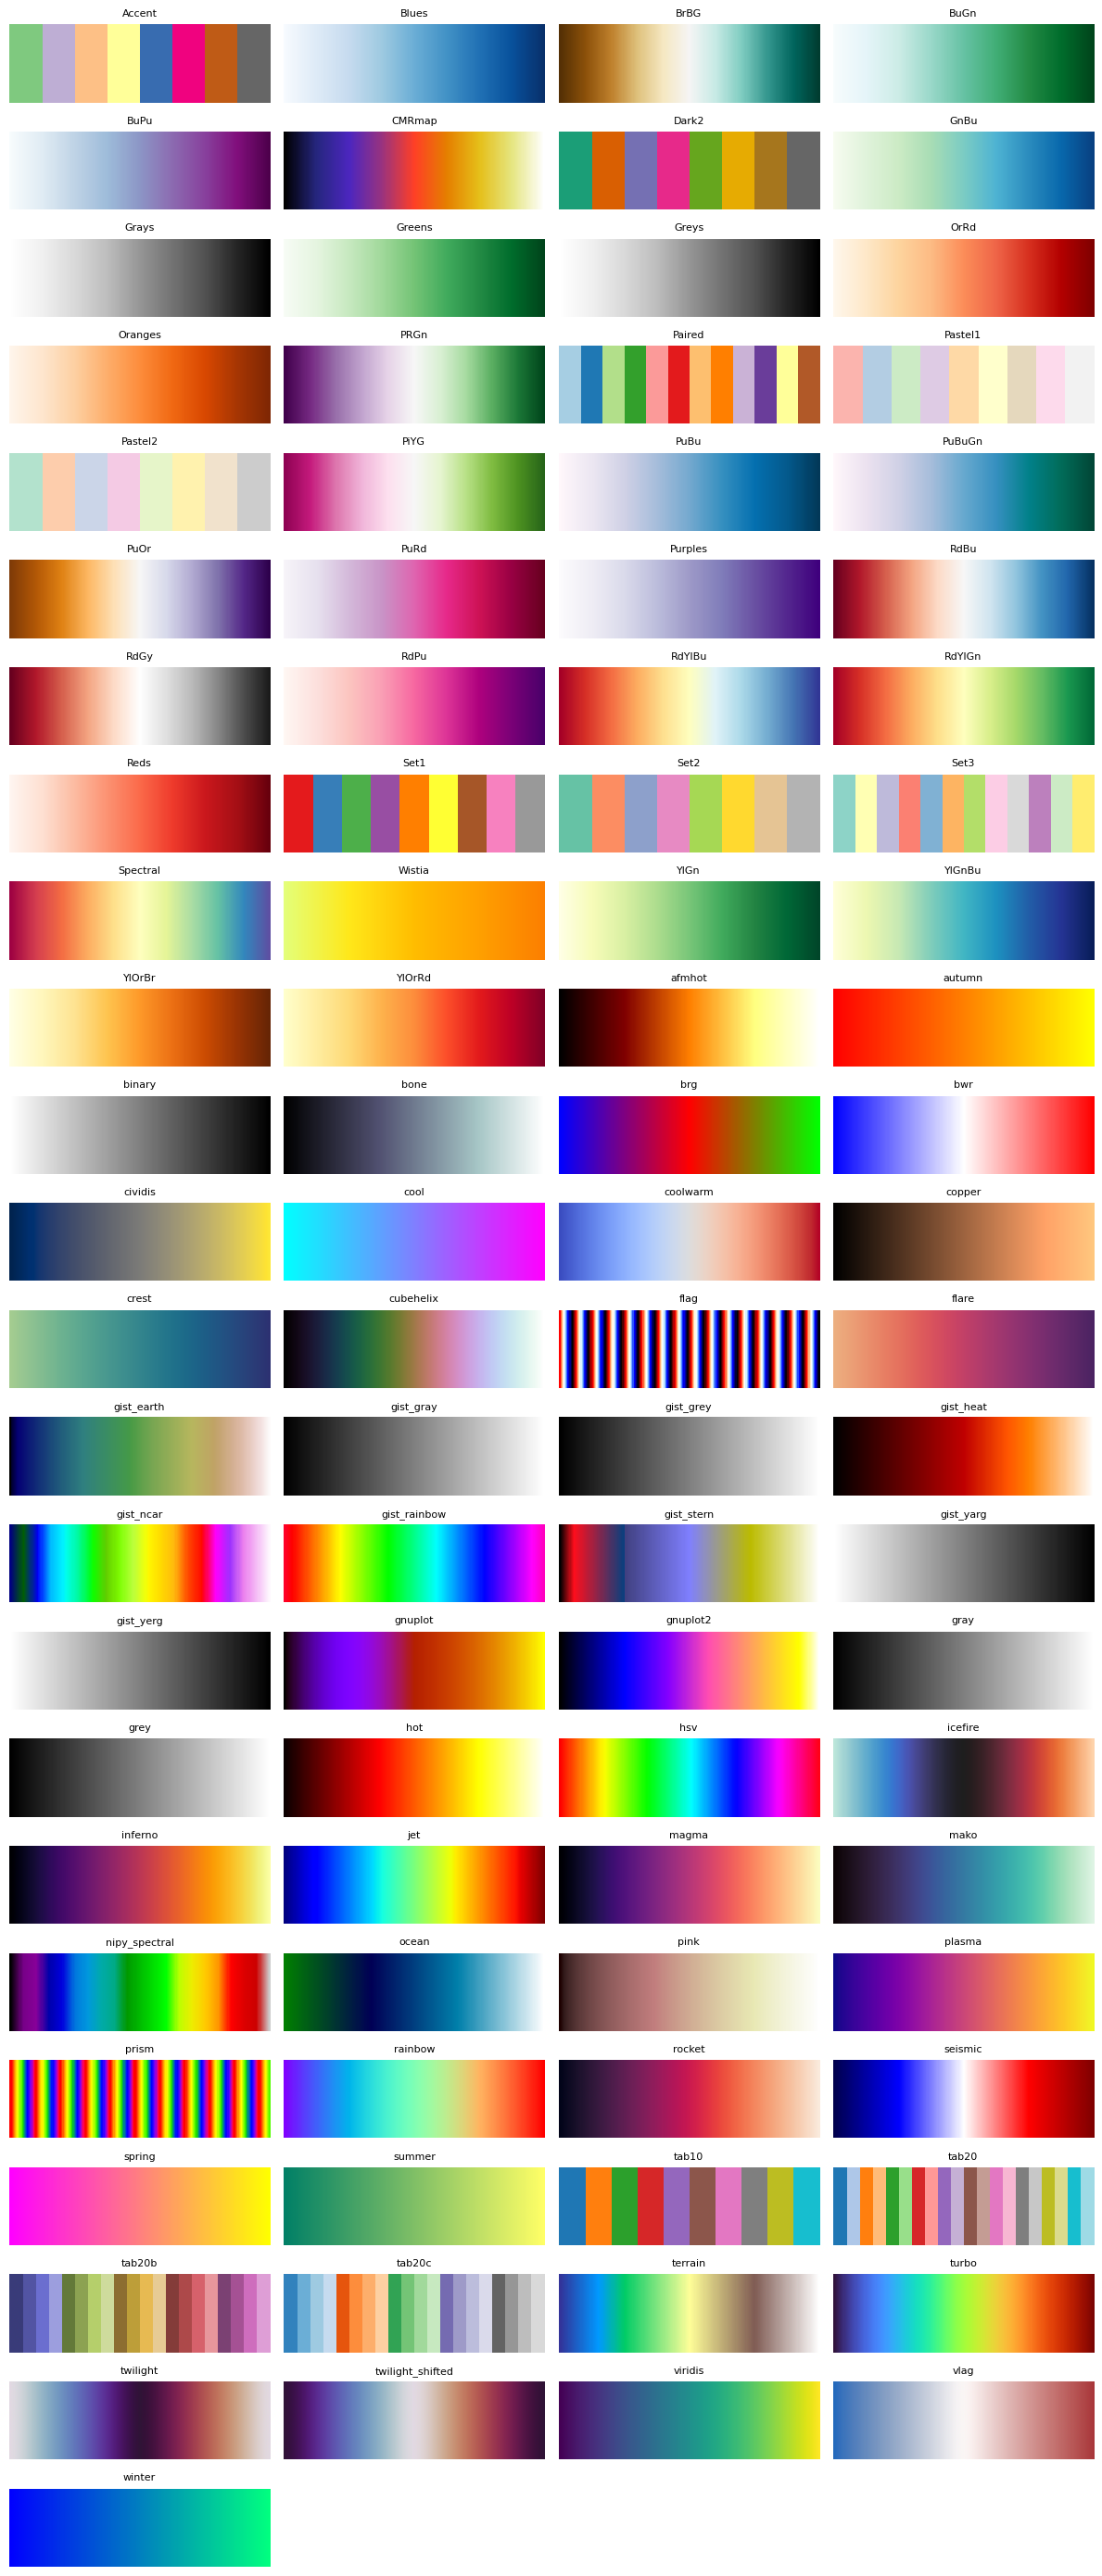

In [111]:


cmaps = sorted([m for m in plt.colormaps() if not m.endswith("_r")])

# 准备数据
gradient = np.linspace(0, 1, 256).reshape(1, -1)  # 渐变条

# 创建图形
fig, axes = plt.subplots(len(cmaps) // 4 + 1, 4, figsize=(12, len(cmaps) * 0.3))
axes = axes.flatten()

# 可视化 colormap
for ax, cmap_name in zip(axes, cmaps):
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap_name))
    ax.set_title(cmap_name, fontsize=8)
    ax.axis("off")

# 删除多余的子图
for ax in axes[len(cmaps):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [165]:
small_type_df = type_df.loc[hierarc.loc[(hierarc.score>3) & (hierarc.score<=6)].gene_name]
small_type_df = small_type_df.loc[small_type_df[small_type_df=='isoform_spec'].count(axis=1)>3]
small_type_df = small_type_df.replace('desgene',1)
small_type_df = small_type_df.replace('isoform_spec',0)

In [121]:
rdylgn = plt.cm.get_cmap("RdYlGn_r")  # 获取 viridis colormap
new_rdylgn = mcolors.ListedColormap(rdylgn(np.linspace(0.2, 0.6, 256)))  # 只取浅色部分


/tmp/ipykernel_838261/1083345149.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rdylgn = plt.cm.get_cmap("RdYlGn_r")  # 获取 viridis colormap


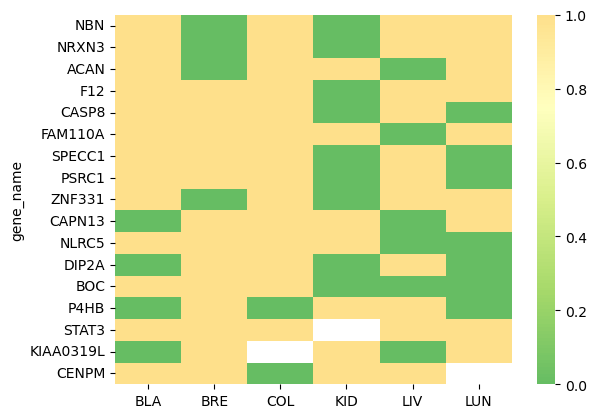

In [1970]:
sns.heatmap(test_type_df[['BLA','BRE','COL','KID','LIV','LUN']],cmap=new_rdylgn)
plt.savefig('/data1/DYY/bambu/plot/figure6/6d.pdf',dpi=400
)

In [177]:
hierarc.loc[hierarc.gene_name=='HSPD1']

,score,gene_name
ensg,,
ENSG00000144381.18,3.060131,HSPD1


In [175]:
type_df.loc['HSPD1']

LIV    isoform_spec
LUN    isoform_spec
BLA    isoform_spec
KID    isoform_spec
END    isoform_spec
CER    isoform_spec
BRE         desgene
STO    isoform_spec
REC         desgene
COL    isoform_spec
Name: HSPD1, dtype: object

<Axes: ylabel='gene_name'>

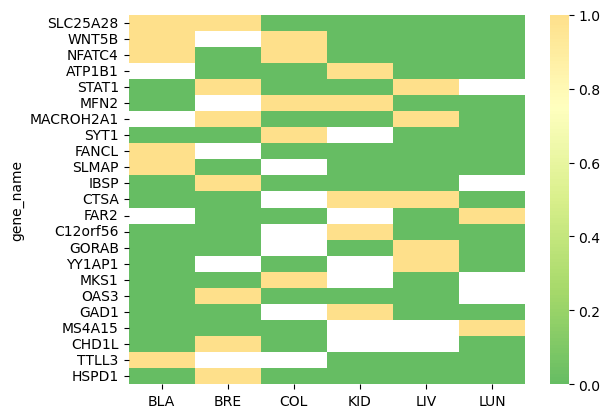

In [167]:
# plt.figure(figsize=(5,10))
sns.heatmap(small_type_df[['BLA','BRE','COL','KID','LIV','LUN']].drop('ENSG00000271793'),cmap=new_rdylgn)
# plt.savefig('/data1/DYY/bambu/plot/figure6/6e.pdf',dpi=400)

In [173]:
small_type_df[small_type_df==0].count(axis=1)

gene_name
SLC25A28           5
WNT5B              4
NFATC4             4
ATP1B1             4
STAT1              4
MFN2               4
MACROH2A1          4
SYT1               5
FANCL              5
SLMAP              4
IBSP               5
CTSA               4
FAR2               4
ENSG00000271793    4
C12orf56           4
GORAB              5
YY1AP1             4
MKS1               4
OAS3               5
GAD1               4
MS4A15             4
CHD1L              4
TTLL3              4
HSPD1              8
dtype: int64

In [1978]:
hierarc.loc[(hierarc.score>=6) & (hierarc.score<9)].reset_index()['ensg'].str.split('.',expand=True).iloc[:,0]

0      ENSG00000164741
1      ENSG00000127603
2      ENSG00000167460
3      ENSG00000106772
4      ENSG00000077782
            ...       
267    ENSG00000104447
268    ENSG00000185624
269    ENSG00000168610
270    ENSG00000142687
271    ENSG00000100162
Name: 0, Length: 272, dtype: object

# test

In [3]:
unfilter = pd.read_csv('/data1/DYY/data/DESeq2/all_norm.counts.fn', sep='\t').T
group = pd.read_csv('/data1/DYY/data/group.csv', sep='\t')
group = group.drop('Sample', axis=1).rename(columns={'name':'Sample'})
merge_df = unfilter.drop(['A1701478J11TN1','A2102504rccTN2']).reset_index().rename(columns={'index':'Sample'}).merge(group[['Sample','Type','Sample ID']])
merge_df = merge_df[merge_df.Type=='Normal']
group = merge_df[['Sample ID']].reset_index(drop=True)
merge_df = merge_df.drop(['Type','Sample ID'],axis=1).set_index('Sample')


['LUN7','LUN18','CER1','CER2','CER3','CER14','KID17','KID1','END2','END4','REC7','COL4','COL5','STO2','STO4','STO6','STO7','STO8','STO9','STO11','STO13','LIV4'] 
drop samples

In [6]:
group = pd.read_csv('/data1/DYY/data/group.csv', sep='\t')
group = group.drop('Sample', axis=1).rename(columns={'name':'Sample'})
merge_df = unfilter.drop(['A1701478J11TN1','A2102504rccTN2']).reset_index().rename(columns={'index':'Sample'}).merge(group[['Sample','Type','Sample ID']])
merge_df = merge_df[merge_df.Type=='Normal']
merge_df=merge_df.drop(merge_df[merge_df['Sample ID'].isin(['LUN7','LUN18','CER1','CER2','CER3','CER14','KID17','KID1','END2','END4','REC7','COL4','COL5','STO2','STO4','STO6','STO7','STO8','STO9','STO11','STO13','LIV4','END3','KID3'])].index)
group = merge_df[['Sample ID']].reset_index(drop=True)
merge_df = merge_df.drop(['Type','Sample ID'],axis=1).set_index('Sample')

In [4]:
group = pd.read_csv('/data1/DYY/data/group.csv', sep='\t')
group = group.drop('Sample', axis=1).rename(columns={'name':'Sample'})
merge_df = unfilter.drop(['A1701478J11TN1','A2102504rccTN2']).reset_index().rename(columns={'index':'Sample'}).merge(group[['Sample','Type','Sample ID']])
merge_df = merge_df[merge_df.Type=='Normal']
merge_df=merge_df.drop(merge_df[merge_df['Sample ID'].isin(['REC7','COL5','END2','END3','END4','LUN8','LUN6','LUN18','KID3','KID17','STO2','STO4','STO13','LIV3'])].index)
group = merge_df[['Sample ID']].reset_index(drop=True)
merge_df = merge_df.drop(['Type','Sample ID'],axis=1).set_index('Sample')

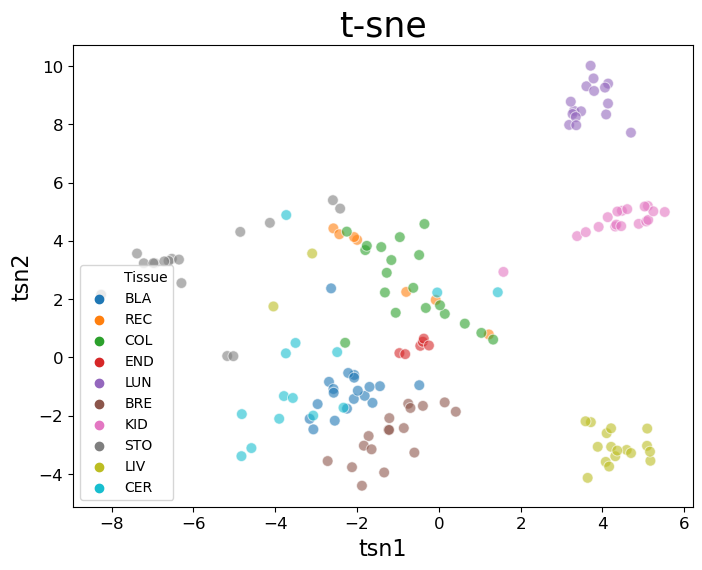

In [5]:
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=40, n_jobs=50, random_state=47).fit_transform(merge_df)
principalDf = pd.DataFrame(X_embedded, columns=['tsne1','tsne2'])
finalDf = pd.concat([principalDf,group], axis=1)
finalDf['Tissue'] = [x[:3] for x in finalDf['Sample ID']]
plt.figure(figsize=(8,6))
# markers = {"Normal": "X", "Tumor": "o"}
fig = sns.scatterplot(data=finalDf, x="tsne1", y="tsne2", hue=finalDf['Tissue'], s=60, alpha  = 0.6)
fig.set_xlabel('tsn1',fontsize=16)
fig.set_ylabel('tsn2',fontsize=16)
fig.set_title("t-sne",fontsize=25)
fig.tick_params(labelsize=12) #刻度大小
plt.show()
scatter_fig = fig.get_figure()

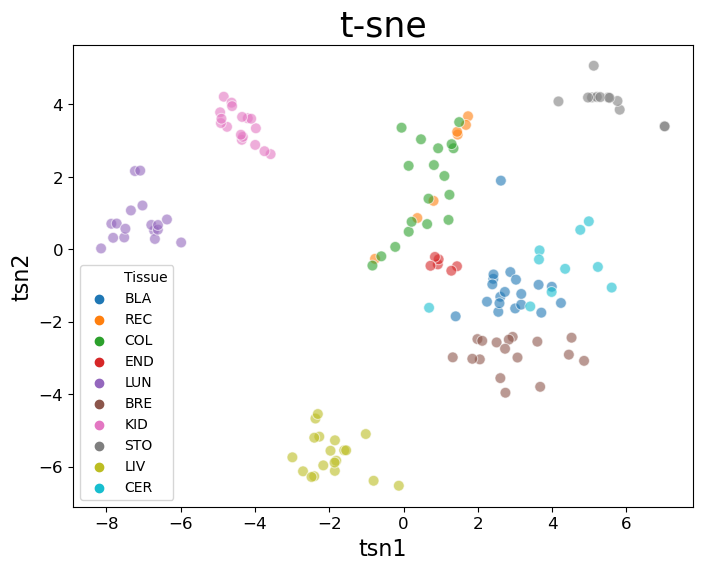

In [7]:
X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=40, n_jobs=50, random_state=47).fit_transform(merge_df)
principalDf = pd.DataFrame(X_embedded, columns=['tsne1','tsne2'])
finalDf = pd.concat([principalDf,group], axis=1)
finalDf['Tissue'] = [x[:3] for x in finalDf['Sample ID']]
plt.figure(figsize=(8,6))
# markers = {"Normal": "X", "Tumor": "o"}
fig = sns.scatterplot(data=finalDf, x="tsne1", y="tsne2", hue=finalDf['Tissue'], s=60, alpha  = 0.6)
fig.set_xlabel('tsn1',fontsize=16)
fig.set_ylabel('tsn2',fontsize=16)
fig.set_title("t-sne",fontsize=25)
fig.tick_params(labelsize=12) #刻度大小
plt.show()
scatter_fig = fig.get_figure()

In [41]:
scatter_fig.savefig('/data1/DYY/summary/data_qc/normal_tissue_umap+heatmap/seed47_perplexity40_tsne.pdf',bbox_inches='tight')

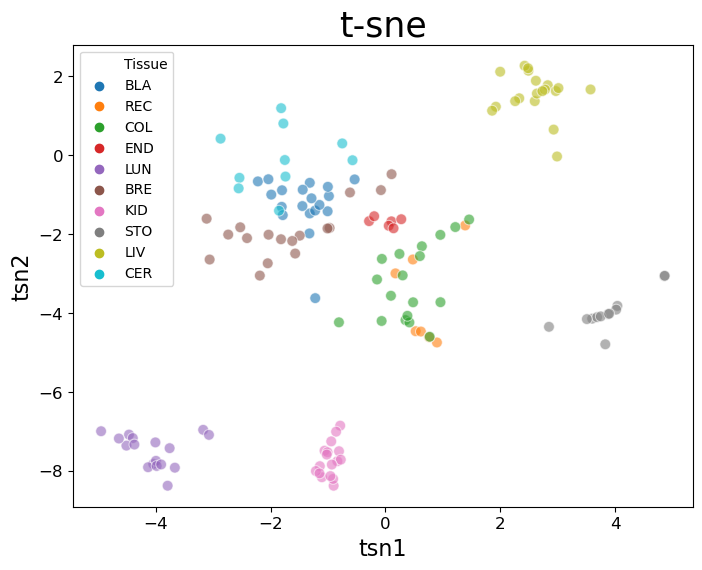

In [34]:

# fig_path = "/data1/DYY/plot/tsne/t-sne_sactterplot.pdf"
# scatter_fig.savefig(fig_path, dpi = 400)

NameError: name 'targets' is not defined

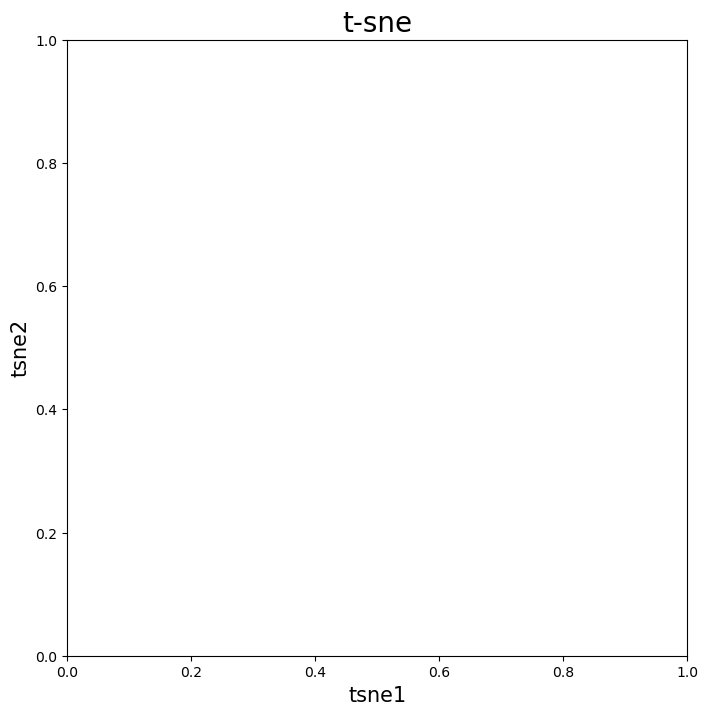

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('tsne1', fontsize = 15)
ax.set_ylabel('tsne2', fontsize = 15)
ax.set_title('t-sne', fontsize = 20)
# targets = ['Normal', 'Tumor']
colors = ["#006FA6", "#FF4A46"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne1'], finalDf.loc[indicesToKeep, 'tsne2'], c=np.linspace(0,1,166), cmap='coolwarm', s = 30)
    ax.legend(targets)
    ax.grid()

In [ ]:
sample = [finalDf['Sample'].tolist()]+[finalDf['Type'].tolist()]

In [ ]:
plt.figure(figsize=(10,8))
markers = {"Normal": "X", "Tumor": "o"}
fig = sns.scatterplot(data=finalDf, x="tsne1", y="tsne2", style="Type", markers=markers, hue=finalDf['Sample'], s=80, alpha  = 0.6)
fig.set_xlabel('tsn1',fontsize=16)
fig.set_ylabel('tsn2',fontsize=16)
fig.set_title("t-sne",fontsize=25)
fig.tick_params(labelsize=12) #刻度大小
plt.show()
scatter_fig = fig.get_figure()
fig_path = "/data1/DYY/plot/t-sne_sactterplot.pdf"
scatter_fig.savefig(fig_path, dpi = 400)

In [22]:
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='deprecated')
 |  
 |  T-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSV